<a href="https://colab.research.google.com/github/janmlew/pgithist/blob/main/DC_project_GitHub_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uwaga! Kod poniżej to jeden z projektów DataCamp (edytowany częściowo przez [Spyder](https://www.spyder-ide.org/), a później w Colabie).

Import bibliotek.

In [ ]:
import pandas as pd

Import danych z plików.

In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/Project/datasets/'

pulls_one = pd.read_csv(PATH+'pulls_2011-2013.csv')
pulls_two = pd.read_csv(PATH+'pulls_2014-2018.csv')
pull_files = pd.read_csv(PATH+'pull_files.csv')

<p>Przygotowywanie danych, w tym łączenie danych z dwóch źródeł do jednego DataFrame.</p><p>
Następnie przystąpimy do konwersji danych w importowanych jako string do formatu datetime, a potem zmienimy format dat z czasu lokalnego do UTC.</p>

In [ ]:
pulls = pd.concat([pulls_one, pulls_two], ignore_index=True)
pulls['date'] = pd.to_datetime(pulls['date'], utc=True)

<p>Łączenie dwóch DF.</p>
<p>Ale uwaga: <b>Co zawierają oba DataFrame'y?</b> Nie zostało to explicite ujęte w warunkach zadania, ale nie sądzę, że powinienem traktować swoją naukę jako prostą iterację zadań.</p>
<p>Muszę to koniecznie sprawdzić.)</p>
<p>Sprawdziłem :).</p>

In [ ]:
data = pulls.merge(pull_files, on='pid')

In order to check whether Scala is still mantained, we want to plot a chart of its use through time. Let's do this.

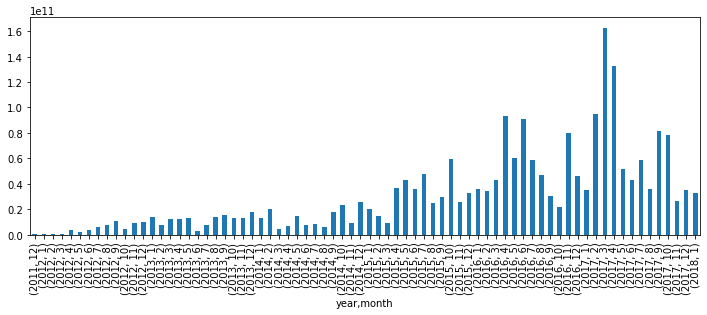

In [ ]:
#%matplotlib inline

data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

counts = data.groupby(['year', 'month'])['pid'].sum()
counts.plot(kind='bar', figsize=(12,4))

By using a chart, we want to see how large is the base of contributors who pull many requests / contribute much to the project.

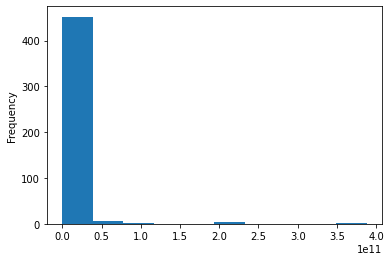

In [ ]:
#%matplotlib inline

by_user = data.groupby('user')['pid'].sum()
by_user.plot(kind='hist')

Identify the last ten files that have changed.

In [ ]:
last_10 = pulls.nlargest(10, 'date')
joined_pr = last_10.merge(pull_files, on='pid')
files = set(joined_pr['file'])
print(files)

{'src/compiler/scala/reflect/reify/phases/Calculate.scala', 'src/library/scala/util/Properties.scala', 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala', 'src/compiler/scala/tools/nsc/profile/Profiler.scala', 'test/files/pos/parallel-classloader.scala', 'test/files/pos/t10568/Converter.java', 'test/files/neg/leibniz-liskov.check', 'src/library/scala/concurrent/Lock.scala', 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala', 'test/files/neg/leibniz-liskov.scala', 'test/files/pos/leibniz_liskov.scala', 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala', 'test/files/run/t8348/Test.scala', 'test/files/pos/leibniz-liskov.scala', 'test/files/pos/t9291.scala', 'src/library/scala/Predef.scala', 'src/scalap/decoder.properties', 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala', 'test/files/pos/t5638/Usage.scala', 'test/files/run/t8348.check', 'test/files/pos/t10686.scala', 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala', 'test/files/run/t8348/T

We identified src/compiler/scala/reflect/reify/phases/Calculate.scala as being recently changed. We are interested in the top 3 developers who changed that file. Those developers are the ones most likely to have the best understanding of the code.

In [ ]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
file_pr = data[data['file']==file]
author_counts = file_pr.groupby('user')['pid'].count()
print(author_counts.nlargest(3))

user
xeno-by     11
retronym     5
soc          4
Name: pid, dtype: int64


<p>Identify the most recent ten pull requests that touched src/compiler/scala/reflect/reify/phases/Calculate.scala.
</p><p>

*   Select the pull requests that touched the file and name the resulting DataFrame file_pr.
*   Merge file_pr with the pulls DataFrame on the pid column and name the resulting DataFrame joined_pr.
*   Using set(), create a set of users for the ten most recent pull requests.</p>
<p>
To find the ten most recent pull requests, use the nlargest function of a DataFrame. Again, pandas' nlargest method (<a href="https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html">documentation</a>) may be helpful for this third bullet.</p>

In [ ]:
# file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
# file_pr = data[data['file']==file]

# Merge the obtained results with the pulls DataFrame
joined_pr = file_pr.merge(pulls, on='pid')

# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10, 'date_x')['user_x'])

# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

Plot the number of pull requests for two developers, over time.

*   Using the *pulls* DataFrame, select all of the pull requests by these two developers and name the resulting DataFrame *by_author*.
*   Fill in the *groupby* parameters to count the number of pull requests submitted by each author each year. That is, group by *user* and the year property of *date*.
*   Plot *counts_wide* using a bar chart.

pandas' *isin* method (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html">documentation</a>) will be helpful for bullet one.

*DateTime* objects expose the components of a date through their *dt* accessors.

*counts* is transformed to a wide format to make plotting the bar chart of pull request count (y-axis) by year (x-axis) by user (legend) easier.

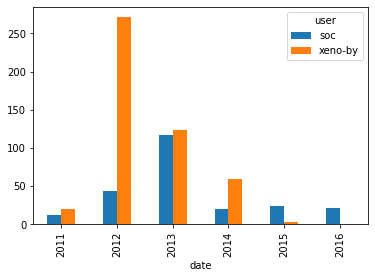

In [ ]:
# %matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls['user'].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby(['user', by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
counts_wide.plot(kind='bar')

Calculate the number of pull requests submitted by a developer to a file each year.

*   Select the pull requests submitted by the authors from the *data* DataFrame and name the results *by_author*.
*   Select the pull requests from *by_author* that affect the file and name the results *by_file*.
*   Transform *grouped* into a wide format using *pivot_table*. Name the results *by_file_wide*.

The code required to complete bullet one in this task is the same as the code for bullet one in task 9, except on the *data* DataFrame instead of the *pulls* DataFrame.

*by_file* is transformed to a wide format to make plotting the bar chart of pull request count (y-axis) by year (x-axis) by user (legend) easier. The columns for *by_file_wide* are as follows:

*   Index column: *date*
*   Columns to expand: *user*
*   Value columns: *pid*
*   Fill value: 0

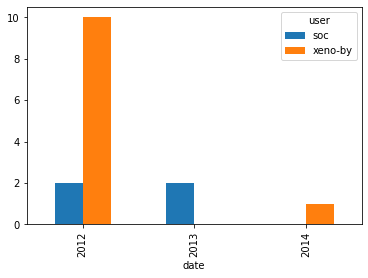

In [ ]:
# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data['user'].isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author['file']==file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
by_file_wide.plot(kind='bar')